In [ ]:
# Если Вы запускаете ноутбук на colab,
# выполните следующие строчки, чтобы подгрузить библиотеки:

# !git clone https://github.com/KrisAnTis-Group/NeyroWineQuality.git && pip install -r NeyroWineQuality/requirements.txt

In [1]:
import numpy as np

# загружаем данные с фичами
datasetRed = np.loadtxt("DataSet/winequality-red.txt", delimiter=";")
datasetWhite = np.loadtxt("DataSet/winequality-white.txt", delimiter=";")

#формируем едины массив красного и белое вина
X = np.concatenate((datasetRed[:, 0:-1], datasetWhite[:, 0:-1]))
Y = np.concatenate((datasetRed[:, -1:], datasetWhite[:, -1:]))

#приведение типов
#метки в int т.к. многоклассовая однозначная классификация
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('int')



In [2]:
#векторизация меток(целей)
#количество меток рассчитывается исходя из датасета
def to_one_hot(labels, demension):
    results = np.zeros((len(labels), demension))
    step_shift = labels.min()
    for i, label in enumerate(labels):
        results[i, int(label - step_shift)] = 1
    return results


size_output_demension = int(Y.max() - Y.min() + 1)
Y = to_one_hot(Y, size_output_demension)

print("DataSet:\nattributes: ", X.shape[1], "\nsamples:", X.shape[0],
      "\nclass labels:", size_output_demension)


DataSet:
attributes:  11 
samples: 6497 
class labels: 7


In [3]:
#Перемешивание вариантов
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

#разделение датасета на тренировочный и тестовый
validation_split = 0.3
validation_samples = int(X.shape[0] * validation_split)
train_samples = X.shape[0] - validation_samples

X_train = X[:train_samples]
Y_train = Y[:train_samples]
X_val = X[train_samples:]
Y_val = Y[train_samples:]

print("train_samples: ", train_samples, "\nvalidation_samples:",
      validation_samples)

#нормализация по тренировочной выборке
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_val -= mean
X_val /= std


train_samples:  4548 
validation_samples: 1949


In [4]:
#импорт библиотек Keras
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import RMSprop

#построение модели
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X.shape[1], )))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(size_output_demension, activation='softmax'))


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [5]:
#обучение модели
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    Y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=[X_val, Y_val])



Train on 4548 samples, validate on 1949 samples
Epoch 1/100
4548/4548 [==============================] - 1s 143us/step - loss: 2.4886 - accuracy: 0.1295 - val_loss: 1.9605 - val_accuracy: 0.1437
Epoch 2/100
4548/4548 [==============================] - 0s 43us/step - loss: 2.3488 - accuracy: 0.1555 - val_loss: 1.9422 - val_accuracy: 0.1883
Epoch 3/100
4548/4548 [==============================] - 0s 38us/step - loss: 2.2405 - accuracy: 0.1772 - val_loss: 1.9395 - val_accuracy: 0.1991
Epoch 4/100
4548/4548 [==============================] - 0s 37us/step - loss: 2.1548 - accuracy: 0.1867 - val_loss: 1.9338 - val_accuracy: 0.2160
Epoch 5/100
4548/4548 [==============================] - 0s 37us/step - loss: 2.0920 - accuracy: 0.2073 - val_loss: 1.9107 - val_accuracy: 0.2360
Epoch 6/100
4548/4548 [==============================] - 0s 35us/step - loss: 2.0133 - accuracy: 0.2381 - val_loss: 1.8764 - val_accuracy: 0.2617
Epoch 7/100
4548/4548 [==============================] - 0s 35us/step - lo

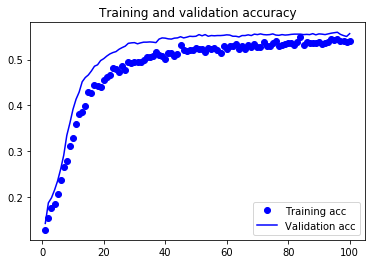

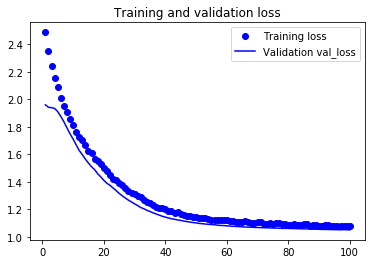

In [6]:
#графики изменения качества модели
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation val_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()